In [2]:
import pandas as pd
import numpy as np
import importlib
import mds as mds
import isomap as isomap
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Data Exploration

In [3]:
df = pd.read_csv('./data/zoo.csv')
print(df.shape)
df.head(5)

(101, 18)


name  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venemous  fins  legs  tail  domestic  catsize  type  
0         1         1         0     0     4     0         0        1     1  
1         1         1         0     0     4     1         0        1     1  
2         1         0         0     1     0     1         0        0     4  
3         1         1         0     0     4     0         0        1     1  
4         1         1         0     0     4     1         0        1     1

In [3]:
# exploring data types
df.dtypes

name        object
hair         int64
feathers     int64
eggs         int64
milk         int64
airborne     int64
aquatic      int64
predator     int64
toothed      int64
backbone     int64
breathes     int64
venemous     int64
fins         int64
legs         int64
tail         int64
domestic     int64
catsize      int64
type         int64
dtype: object

In [4]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

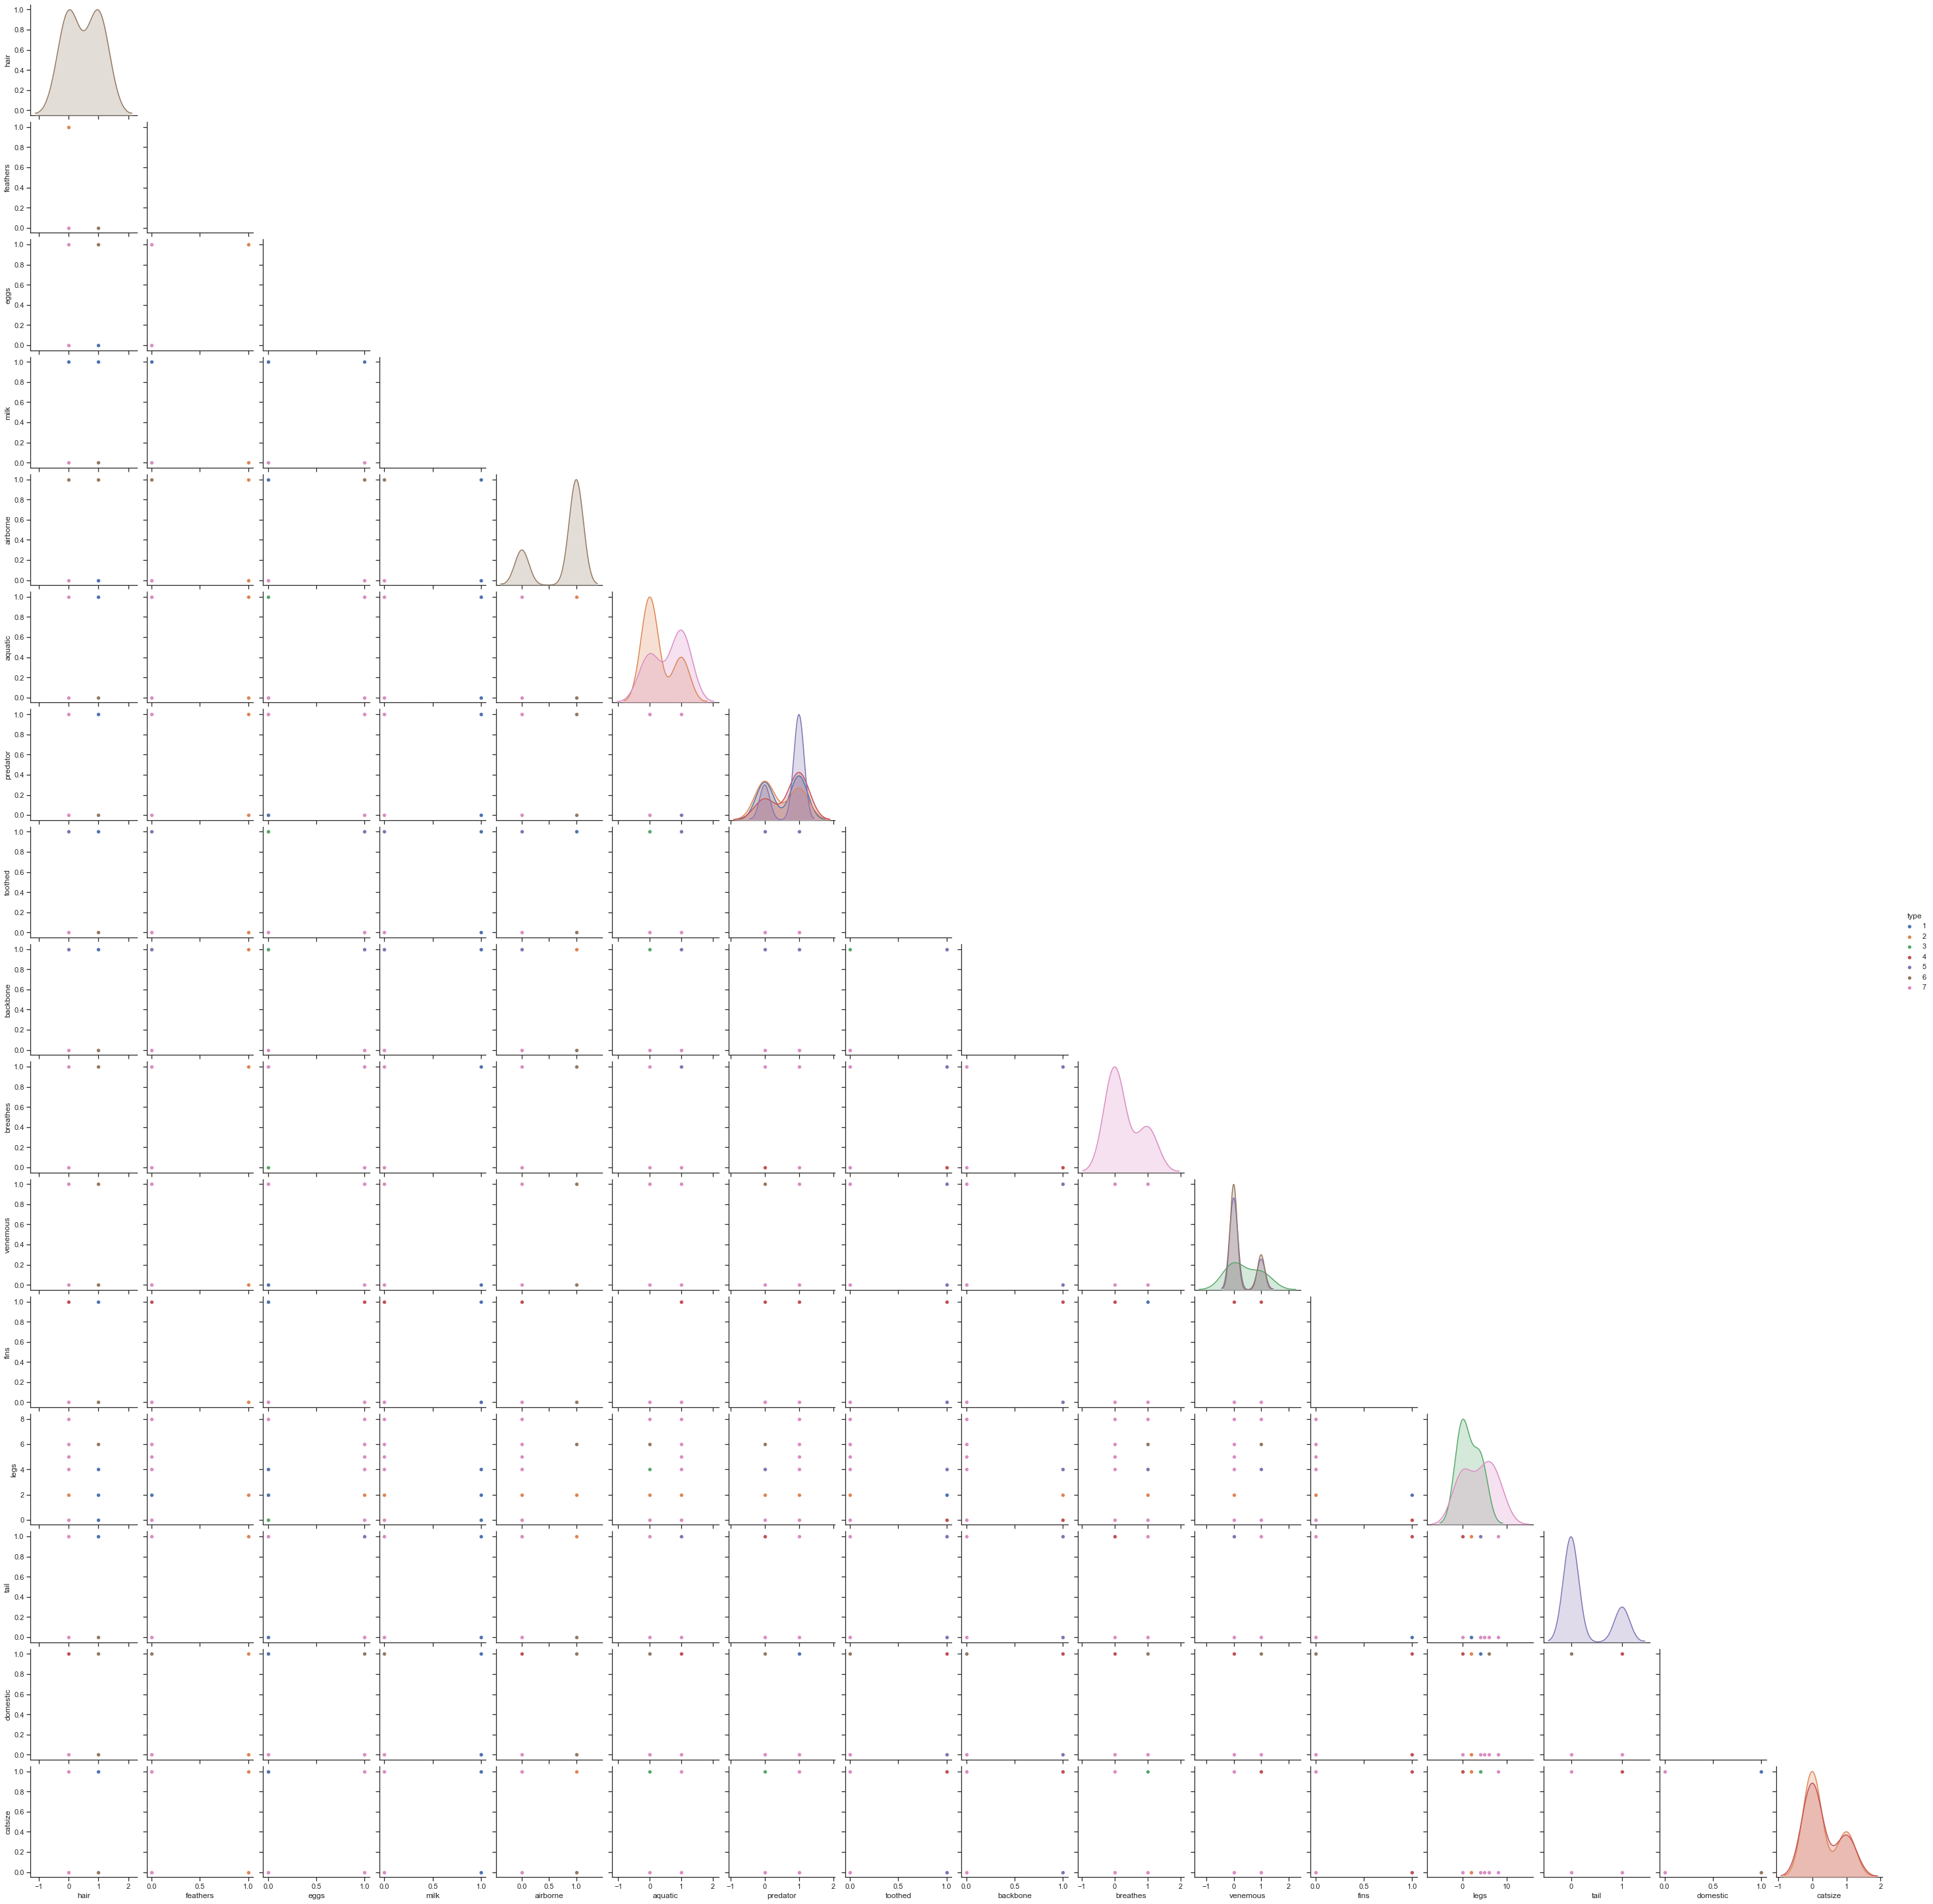

In [5]:
sns.set(style="ticks")
g = sns.pairplot(df, hue="type")
g.map_upper(hide_current_axis)

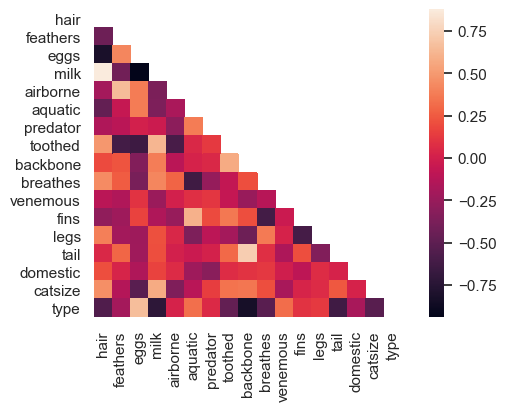

In [54]:
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 4))
    ax = sns.heatmap(corr_matrix, mask=mask, square=True)
fig = ax.get_figure()    
fig.savefig("./images/cor_matrix.png")

# Features selection and engineering

In [55]:
animals = df.drop(columns=['type', 'name'])
animals.head(5)

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venemous  fins  legs  tail  domestic  catsize  
0         1         0     0     4     0         0        1  
1         1         0     0     4     1         0        1  
2         0         0     1     0     1         0        0  
3         1         0     0     4     0         0        1  
4         1         0     0     4     1         0        1

# Intrinsic dimension Estimation 
The intrinsic dimension is indicated by a sudden descent in the plot.

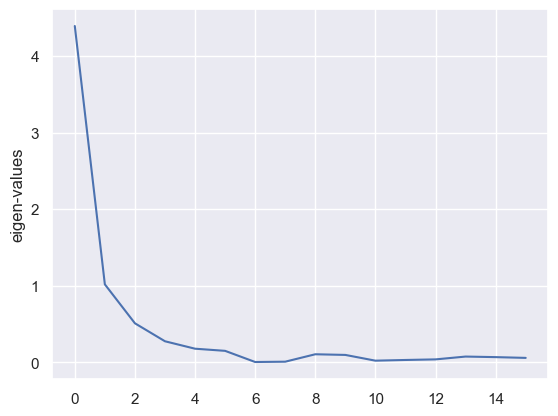

In [56]:
sns.set()
cov_matrix = animals.cov()
w, v = np.linalg.eig(cov_matrix)
plt.plot(w)
plt.ylabel('eigen-values')
plt.savefig("./images/eigenval.png")

# UTILS

In [57]:
def transform1D (animals1D):
    animals1D = pd.DataFrame(animals1D)
    animals1D['type'] = df.type
    animals1D['y'] = 0
    animals1D.rename(columns = {0: 'x'}, inplace = True)
    return animals1D
    
def transform2D(animals2D):
    animals2D = pd.DataFrame(animals2D)
    animals2D['type'] = df.type
    animals2D.rename(columns = {0: 'x', 1: 'y'}, inplace = True)
    return animals2D

def transform3D(animals3D):
    animals3D = pd.DataFrame(animals3D)
    animals3D['type'] = df.type
    animals3D.rename(columns = {0: 'x', 1: 'y', 2: 'z'}, inplace = True)
    return animals3D


In [58]:
def plot1D(animals1D, met):
    animals1D = transform1D(animals1D)
    sns.set()
    plot = sns.relplot(
    data=animals1D,
    x="x", y="y", palette="Spectral", hue="type", legend="full")
    fig = plot.fig
    fig.savefig("./images/" + met + "_1D.png")
    return animals1D

def plot2D(animals2D, met):
    animals2D = transform2D(animals2D)
    sns.set()
    plot = sns.relplot(
    data=animals2D,
    x="x", y="y", hue="type", palette="Spectral", legend="full")
    fig = plot.fig
    fig.savefig("./images/" + met + "_2D.png")
    return animals2D
    
def plot3D(animals3D, met):
    animals3D = transform3D(animals3D)
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')
    pca_3D = ax.scatter3D(animals3D["x"], animals3D["y"], animals3D["z"], c=animals3D["type"], cmap='hsv')
    plt.savefig("./images/" + met + "_3D.png")
    return animals3D

# PCA

In [59]:
from sklearn.decomposition import PCA
# test with 1 pc
pca1D = PCA(n_components = 1)
animals1D_pca = pca1D.fit_transform(animals)

# test with 2 pc
pca2D = PCA(n_components = 2)
animals2D_pca = pca2D.fit_transform(animals)

# test with 3 pc
pca3D = PCA(n_components = 3)
animals3D_pca = pca3D.fit_transform(animals)

In [60]:
# retrieving the principal components
pca2D.components_.T[:,0]

array([ 0.10456001, -0.04119308, -0.0634512 ,  0.06124419,  0.00871883,
       -0.09390782, -0.02933828, -0.04185234, -0.07785206,  0.07976334,
        0.00223881, -0.1136071 ,  0.9678112 , -0.07373268,  0.01443446,
        0.02117254])

In [61]:
# retrieving the principal components
pca3D.components_.T[:,0]

array([ 0.10456001, -0.04119308, -0.0634512 ,  0.06124419,  0.00871883,
       -0.09390782, -0.02933828, -0.04185234, -0.07785206,  0.07976334,
        0.00223881, -0.1136071 ,  0.9678112 , -0.07373268,  0.01443446,
        0.02117254])

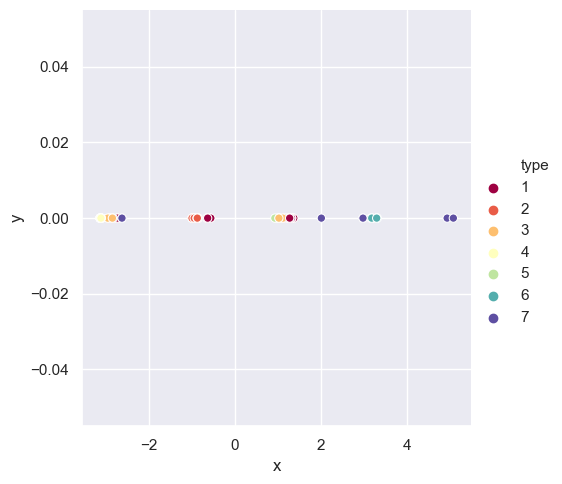

In [62]:
animals1D_pca = plot1D(animals1D_pca, "pca")

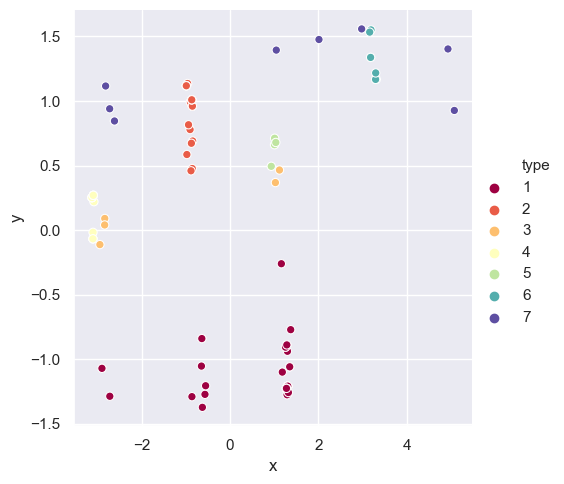

In [63]:
animals2D_pca = plot2D(animals2D_pca, "pca")

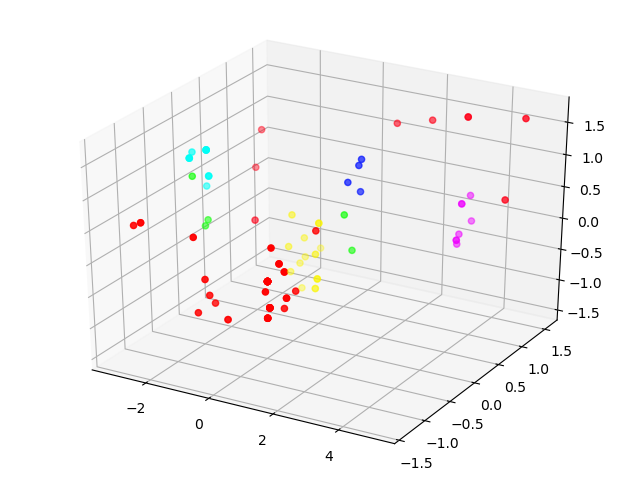

In [64]:
animals3D_pca =plot3D(animals3D_pca, "pca")

# MDS

In [65]:
from sklearn.metrics import pairwise_distances
# center the data 
animals_centered = mds.center_data(animals)
pairwise_dist = pairwise_distances(animals_centered, metric="euclidean", n_jobs=-1)

In [66]:
importlib.reload(mds)
# square of the distances
D = np.square(pairwise_dist)
# double centring of D 
S = mds.double_centring(D)
# applying mds 
animals1D_mds = mds.mds(S,1)
animals2D_mds = mds.mds(S,2)
animals3D_mds = mds.mds(S,3)

In [67]:
animals2D_mds[:5,]

array([[-1.35102851, -1.05853312],
       [-1.30663411, -1.20834446],
       [ 3.13165517,  0.25220045],
       [-1.35102851, -1.05853312],
       [-1.27729583, -1.22574951]])

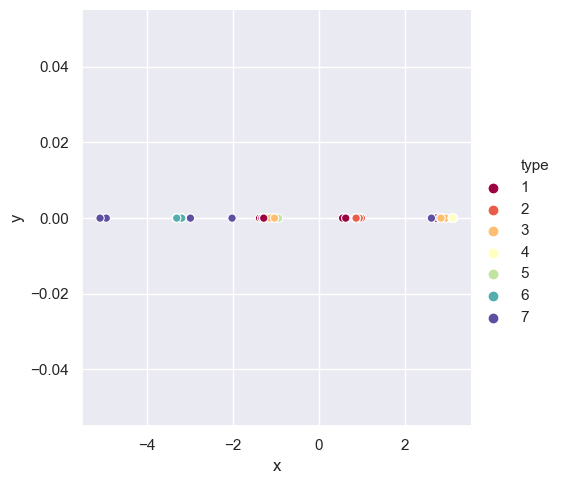

In [68]:
animals1D_mds = plot1D(animals1D_mds, "mds")

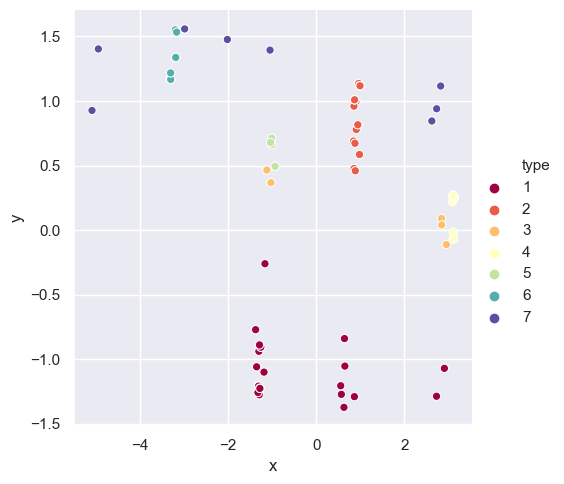

In [69]:
animals2D_mds = plot2D(animals2D_mds, "mds")

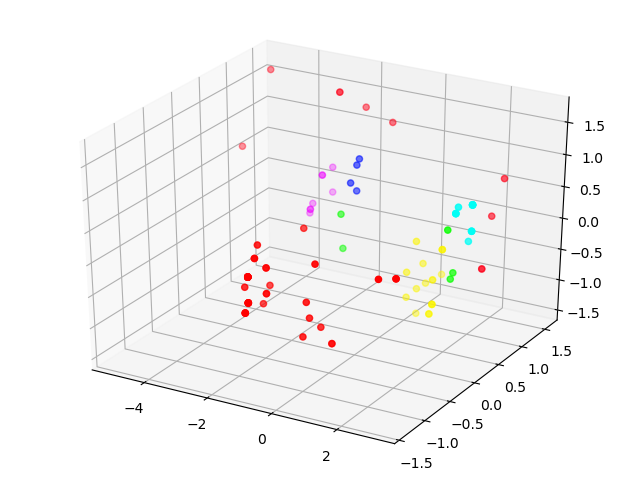

In [70]:
animals3D_mds = plot3D(animals3D_mds, "mds")

## Scikit learn MDS

In [71]:
from sklearn.manifold import MDS
mds2D = MDS(n_components=2)
mds3D = MDS(n_components=3)
animals2D_mds_sk = mds2D.fit_transform(animals_centered)
animals3D_mds_sk = mds3D.fit_transform(animals_centered)

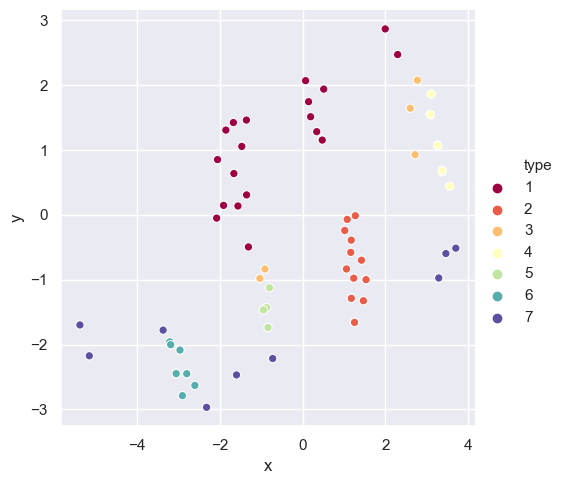

In [72]:
animals2D_mds_sk = plot2D(animals2D_mds_sk, "mds_sk")

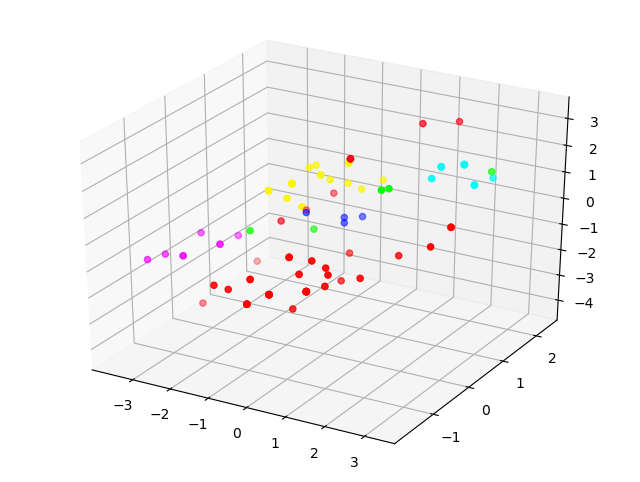

In [73]:
 animals3D_mds_sk = plot3D(animals3D_mds_sk, "mds_sk")

# Enhanced MDS with feature selection
### feature importance with RF


In [74]:
def plot_fimpo(features, importances, image_name):
    sns.set()
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.savefig(f"./images/imp_{image_name}.png")

In [75]:
X, y = animals, df.type
from sklearn.ensemble import RandomForestClassifier
def eval_fimp_rd(n_estimators, max_leaf_nodes, image_name):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, n_jobs=-1, random_state=42)
    clf.fit(X,y)
    plot_fimpo(animals.columns, clf.feature_importances_, image_name)

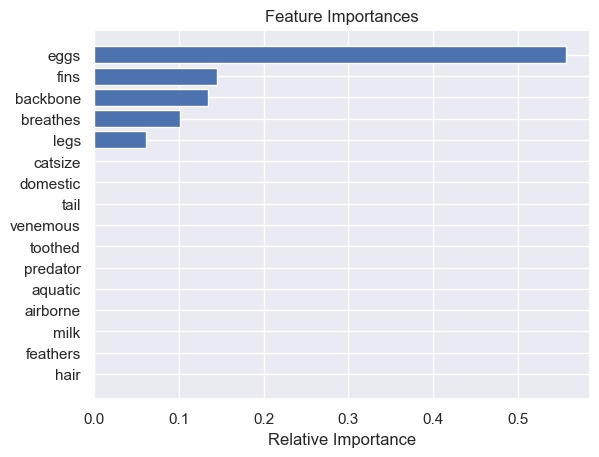

In [76]:
eval_fimp_rd(2,4, '2_4')

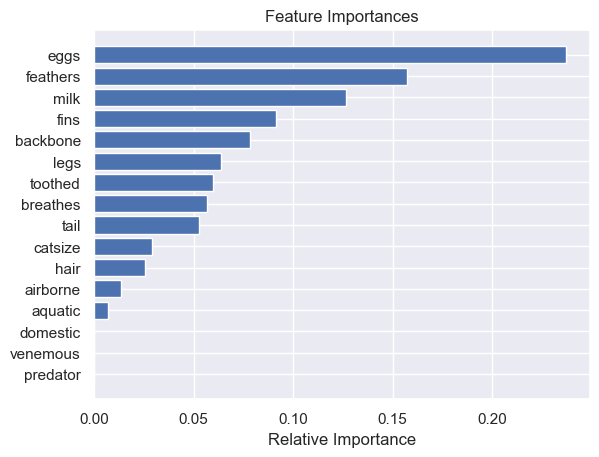

In [77]:
eval_fimp_rd(5,8, '5_8')

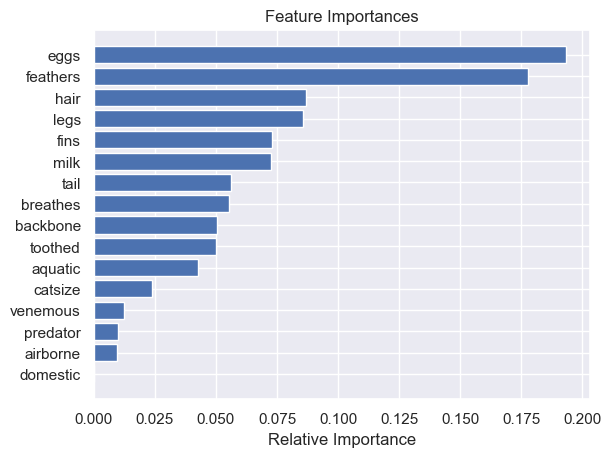

In [78]:
eval_fimp_rd(10,16, '10_16')

### feature importance with chi-quare test

In [79]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=8, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

Fitting estimator with 16 features.
8 selected features


['feathers',
 'eggs',
 'milk',
 'aquatic',
 'toothed',
 'backbone',
 'breathes',
 'tail']

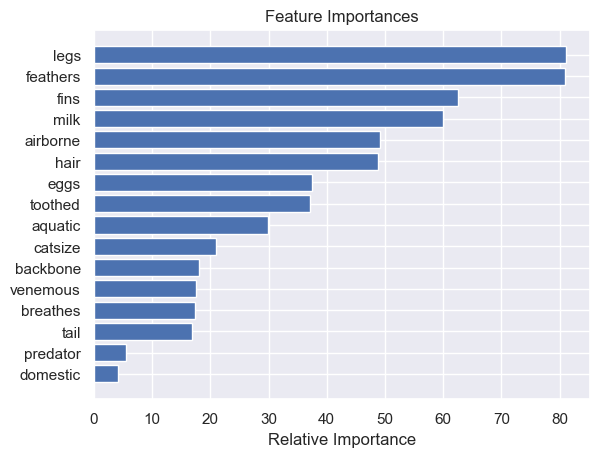

In [80]:
from sklearn.feature_selection import chi2
chi2_score, p_valu = chi2(X, y)
plot_fimpo(animals.columns, chi2_score, 'chi2')

In [81]:
from sklearn.metrics import pairwise_distances
importlib.reload(mds)
def mds_fs(df, columns_to_drop, id):
    animals_selected = df.drop(columns=columns_to_drop)
    # compute paiwise distance
    pairwise_dist = pairwise_distances(animals_selected, metric="euclidean", n_jobs=-1)
    # square of the distances
    D = np.square(pairwise_dist)
    # double centring of D 
    S = mds.double_centring(D)
    animals2D_mds_fs = mds.mds(S,2)
    animals2D_mds_fs = plot2D(animals2D_mds_fs, f"mds_fs_{id}")
    return animals2D_mds_fs

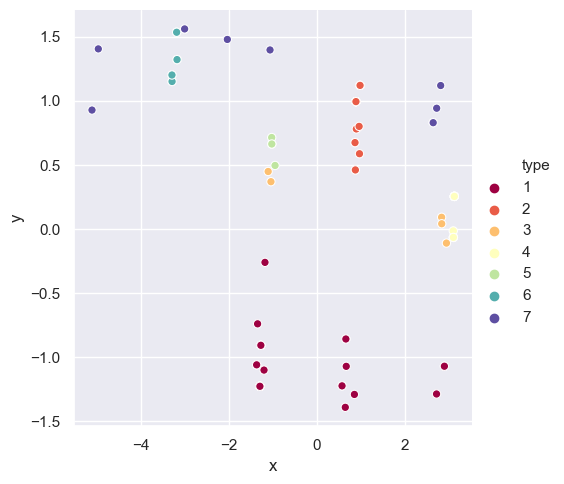

In [82]:
c1 = ['domestic', 'predator']   
animals2D_mds_fs_2 = mds_fs(animals_centered, c1, "2")

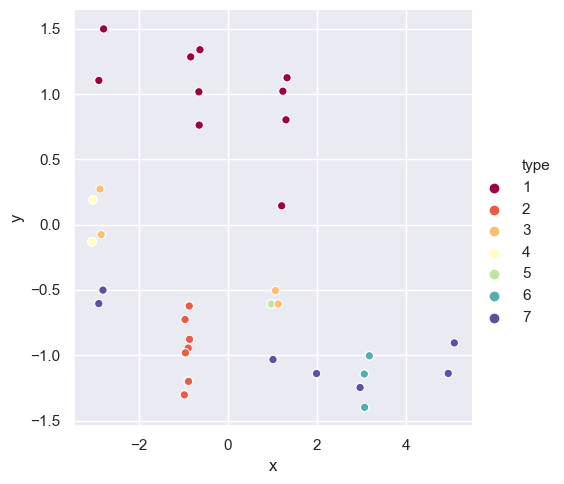

In [83]:
c1 = ['domestic', 'predator', 'tail', 'breathes', 'venemous', 'backbone']
animals2D_mds_fs_6 = mds_fs(animals_centered, c1, "6")

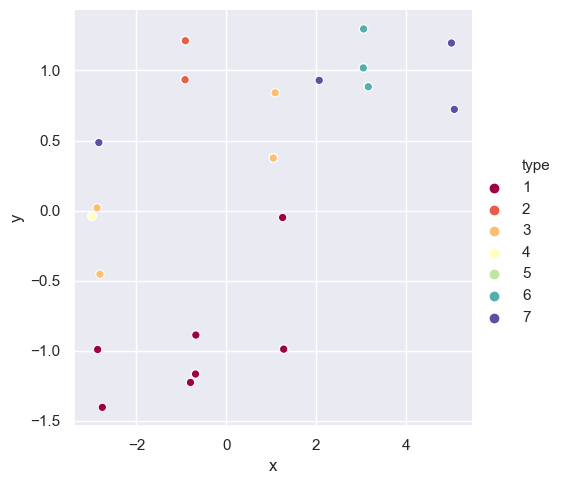

In [84]:
c2= c1 + ['catsize', 'aquatic']
animals2D_mds_fs_8 = mds_fs(animals_centered, c2, "8")

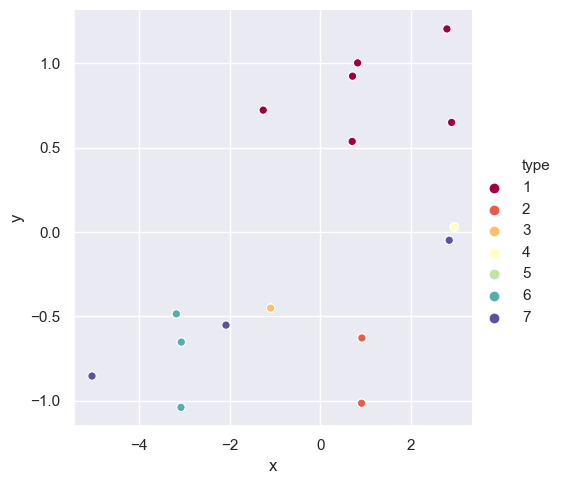

In [85]:
c3= c2 + ['toothed', 'eggs']
animals2D_mds_fs_10 = mds_fs(animals_centered, c3, "10")

# IsoMap

In [86]:
from sklearn.metrics.pairwise import euclidean_distances
delta = euclidean_distances(animals)
# delta = delta.sort(axis=0)
sorted_delta = np.sort(delta, axis=1)
sorted_indexes = np.argsort(delta, axis =1) 

In [87]:
importlib.reload(isomap)
animals1D_im = isomap.isomap(animals, dim=1, k=20)
animals2D_im = isomap.isomap(animals, dim=2, k=20)
animals3D_im = isomap.isomap(animals, dim=3, k=20)

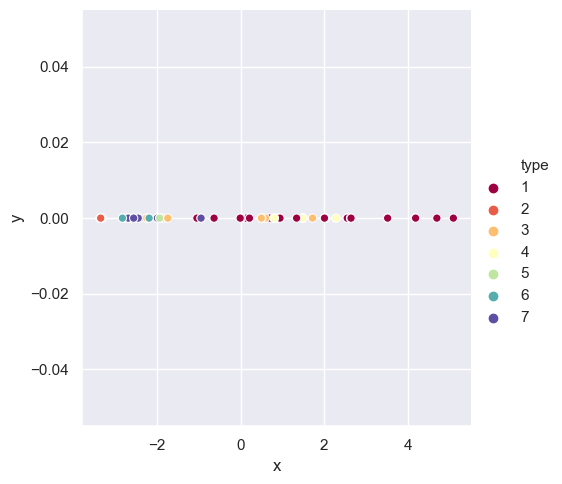

In [88]:
animals1D_im = plot1D(animals1D_im, "im")

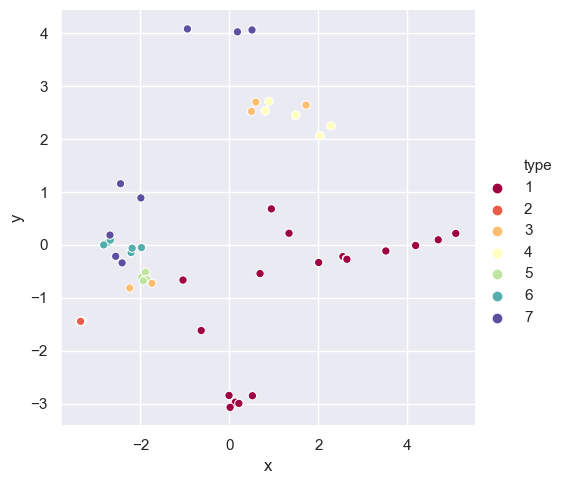

In [89]:
animals2D_im = plot2D(animals2D_im, "im")

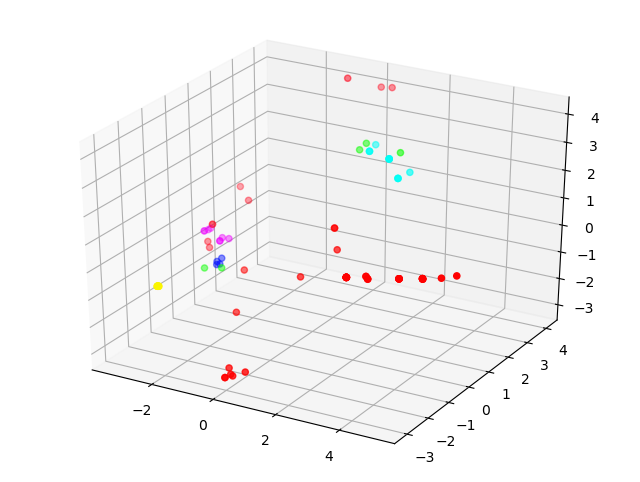

In [90]:
animals3D_im = plot3D(animals3D_im, "im")

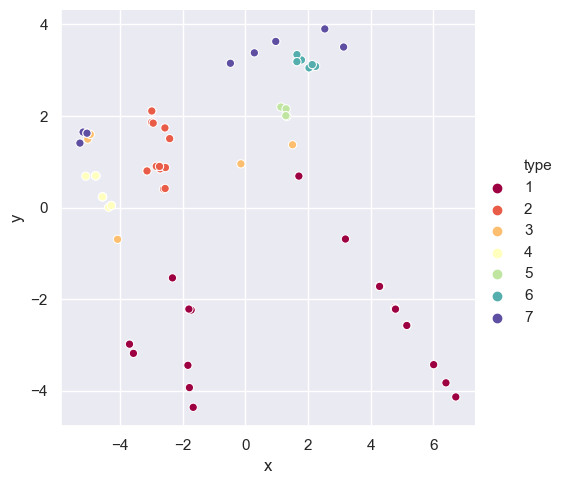

In [91]:
sns.set()
animals2D_im5 = isomap.isomap(animals, dim=2, k=26)
animals2D_im5 = plot2D(animals2D_im5, "im")

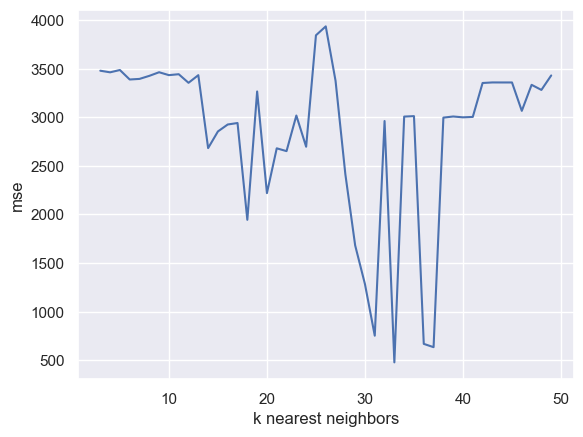

In [92]:
importlib.reload(isomap)
ks = np.arange(3,50,1)
mses = np.zeros(ks.shape)

for i, k in enumerate(ks):
    red = isomap.isomap(animals, dim=2, k=k)
    mses[i] = isomap.evaluate_isomap(animals, red, k=20)
g = sns.lineplot(x=ks, y=mses)
g.set(xlabel='k nearest neighbors', ylabel='mse')
fig = g.get_figure()
fig.savefig('./images/knn_mse.png')

In [93]:
min = np.argmin(mses)
ks[min]

33

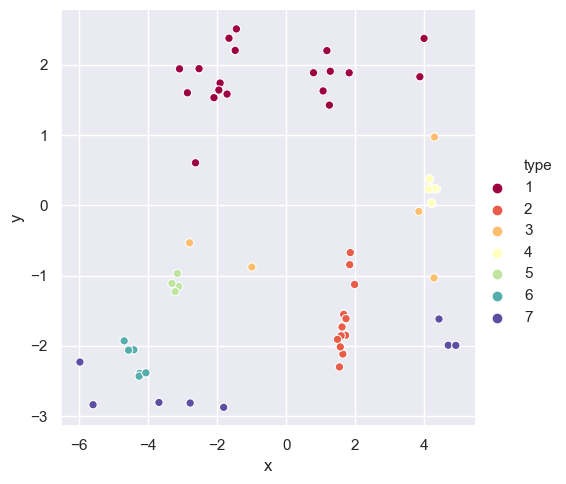

In [94]:
animals2D_im33 = isomap.isomap(animals, dim=2, k=33)
animals2D_im33 = plot2D(animals2D_im33, "im33")

In [95]:
from sklearn.cluster import KMeans
def kmeans_clustering(df):
    kmeans = KMeans(n_clusters=7, random_state=42).fit(df)
    y_kmeans = kmeans.predict(df)
    centers = kmeans.cluster_centers_
    return y_kmeans, centers

In [96]:
y_kmeans_im, centers_im = kmeans_clustering(animals2D_im33)
y_kmeans_pca, centers_pca = kmeans_clustering(animals2D_pca)
y_kmeans_mds, centers_mds = kmeans_clustering(animals2D_mds_fs_8)

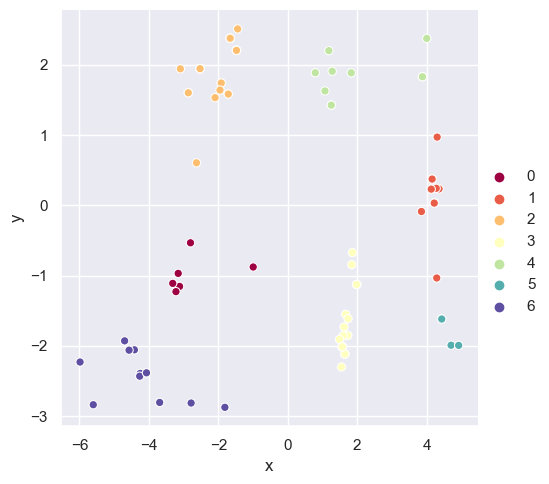

In [97]:
plot = sns.relplot(data=animals2D_im33,x="x", y="y", hue=y_kmeans_im, palette="Spectral", legend="full")
fig1 = plot.fig
fig1.savefig('./images/km_im.png')

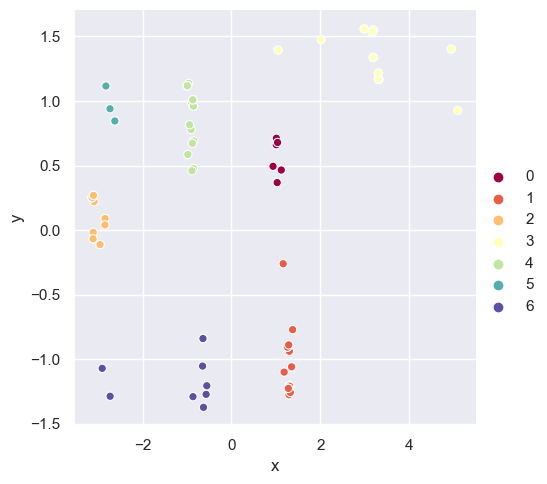

In [98]:
sns.set()
plot = sns.relplot(data=animals2D_pca,x="x", y="y", hue=y_kmeans_pca, palette="Spectral", legend="full")
fig2 = plot.fig
fig2.savefig('./images/km_pca.png')

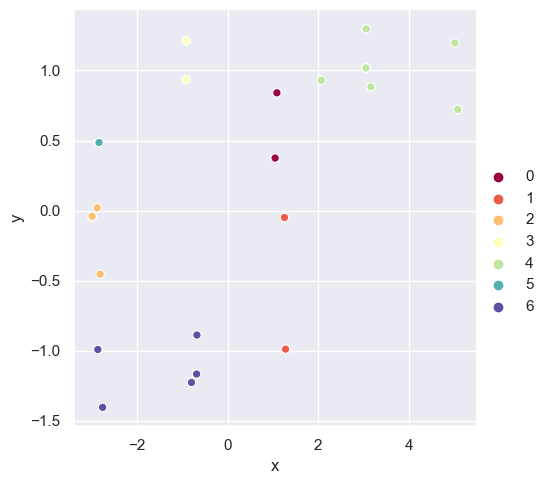

In [99]:
plot = sns.relplot(data=animals2D_mds_fs_8,x="x", y="y", hue=y_kmeans_mds, palette="Spectral", legend="full")
fig3 = plot.fig
fig3.savefig('./images/km_mds.png')